# Show Raw Data

In [ ]:
from typing import Tuple, List
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Preprocess data
# โหลดข้อมูลหุ้น (ตัวอย่าง)
df = pd.read_csv("nvidia_10yr_data.csv", parse_dates=["Date"])
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")


df = df.sort_values("Date")

# Feature engineering
# สร้างฟีเจอร์ใหม่จากข้อมูลหุ้น
df['Return'] = df['Close'].pct_change()
df['Volatility'] = df['Close'].rolling(10).std()
df['Price_Diff'] = df['High'] - df['Low']
df['Volume_Log'] = np.log1p(df['Volume'])

# Drop NaN หลัง rolling
df.dropna(inplace=True)
X = df[['Return', 'Volatility', 'Price_Diff', 'Volume_Log']]
y = df['Close']


In [28]:
df

,Date,Close,High,Low,Open,Volume,Return,Volatility,Price_Diff,Volume_Log
9,2015-01-15,0.470347,0.479946,0.470107,0.477066,188932000,-0.007092,0.007403,0.009839,19.056898
10,2015-01-16,0.478986,0.479466,0.468187,0.469627,181512000,0.018367,0.006822,0.011279,19.016832
11,2015-01-20,0.480426,0.484985,0.474427,0.482346,140308000,0.003006,0.007315,0.010559,18.759351
12,2015-01-21,0.487145,0.488345,0.474427,0.477786,144780000,0.013986,0.007406,0.013918,18.790726
13,2015-01-22,0.495544,0.496984,0.483066,0.488105,159712000,0.017241,0.007769,0.013918,18.888883
...,...,...,...,...,...,...,...,...,...,...
2511,2024-12-24,140.197372,141.877094,138.627619,139.977407,105157000,0.003938,4.204134,3.249475,18.470965
2512,2024-12-26,139.907410,140.827275,137.707768,139.677451,116205600,-0.002068,4.282715,3.119507,18.570872
2513,2024-12-27,136.987885,138.997570,134.688268,138.527645,170582600,-0.020868,4.262276,4.309302,18.954730
2514,2024-12-30,137.467804,140.247354,133.998363,134.808230,167734700,0.003503,4.340256,6.248991,18.937894


In [27]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 2507 entries, 9 to 2515
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2507 non-null   datetime64[ns]
 1   Close       2507 non-null   float64       
 2   High        2507 non-null   float64       
 3   Low         2507 non-null   float64       
 4   Open        2507 non-null   float64       
 5   Volume      2507 non-null   int64         
 6   Return      2507 non-null   float64       
 7   Volatility  2507 non-null   float64       
 8   Price_Diff  2507 non-null   float64       
 9   Volume_Log  2507 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 215.4 KB


,Date,Close,High,Low,Open,Volume,Return,Volatility,Price_Diff,Volume_Log
count,2507,2507.000000,2507.000000,2507.000000,2507.000000,2.507000e+03,2507.000000,2507.000000,2507.000000,2507.000000
mean,2020-01-07 07:43:32.046270208,20.859809,21.239172,20.446820,20.862257,4.685661e+08,0.002719,0.786341,0.792351,19.852080
min,2015-01-15 00:00:00,0.460748,0.472650,0.454509,0.463628,5.244800e+07,-0.187559,0.002267,0.004356,17.775333
25%,2017-07-12 12:00:00,3.564024,3.630799,3.507512,3.578667,3.065700e+08,-0.012435,0.081562,0.078402,19.540957
50%,2020-01-08 00:00:00,6.502590,6.567391,6.379738,6.472079,4.165640e+08,0.002660,0.227448,0.237788,19.847551
75%,2022-07-05 12:00:00,21.305758,21.900414,20.878770,21.260217,5.645260e+08,0.017642,0.822411,0.825545,20.151497
max,2024-12-31 00:00:00,148.845734,152.854800,146.226298,149.315621,3.692928e+09,0.298067,10.722555,13.345791,22.029685
std,NaN,32.349410,32.952650,31.709453,32.386954,2.535790e+08,0.030649,1.376827,1.428890,0.466172


In [12]:
print(df['Date'].min())  # วันที่เก่าที่สุด
print(df['Date'].max())  # วันที่ใหม่ที่สุด
print(len(df))           # จำนวนแถวทั้งหมด

2015-01-15 00:00:00
2024-12-31 00:00:00
2507


In [7]:
print(df['Date'].dtype)  # ควรแสดง datetime64[ns]
print(df['Date'].head())  # ดูรูปแบบวันที่

object
1217    1/11/2019
1720    1/11/2021
1972    1/11/2022
2223    1/11/2023
2475    1/11/2024
Name: Date, dtype: object


In [73]:
# ตรวจ missing
print(df.isnull().sum())

# ค่าที่ซ้ำกัน
df.duplicated().sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


np.int64(0)

In [74]:
df.describe()

,Date,Close,High,Low,Open,Volume
count,2516,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,2019-12-31 19:03:31.764706048,20.786881,21.164913,20.375351,20.789328,4.676480e+08
min,2015-01-02 00:00:00,0.459308,0.467947,0.454509,0.463628,5.244800e+07
25%,2017-07-02 06:00:00,3.545036,3.594863,3.449813,3.515635,3.055120e+08
50%,2020-01-01 00:00:00,6.482601,6.539911,6.338270,6.440887,4.151695e+08
75%,2022-06-30 06:00:00,21.228698,21.733422,20.806877,21.166934,5.640210e+08
max,2024-12-31 00:00:00,148.845734,152.854800,146.226298,149.315621,3.692928e+09
std,NaN,32.314417,32.916986,31.675142,32.351868,2.536131e+08


# Plot Data

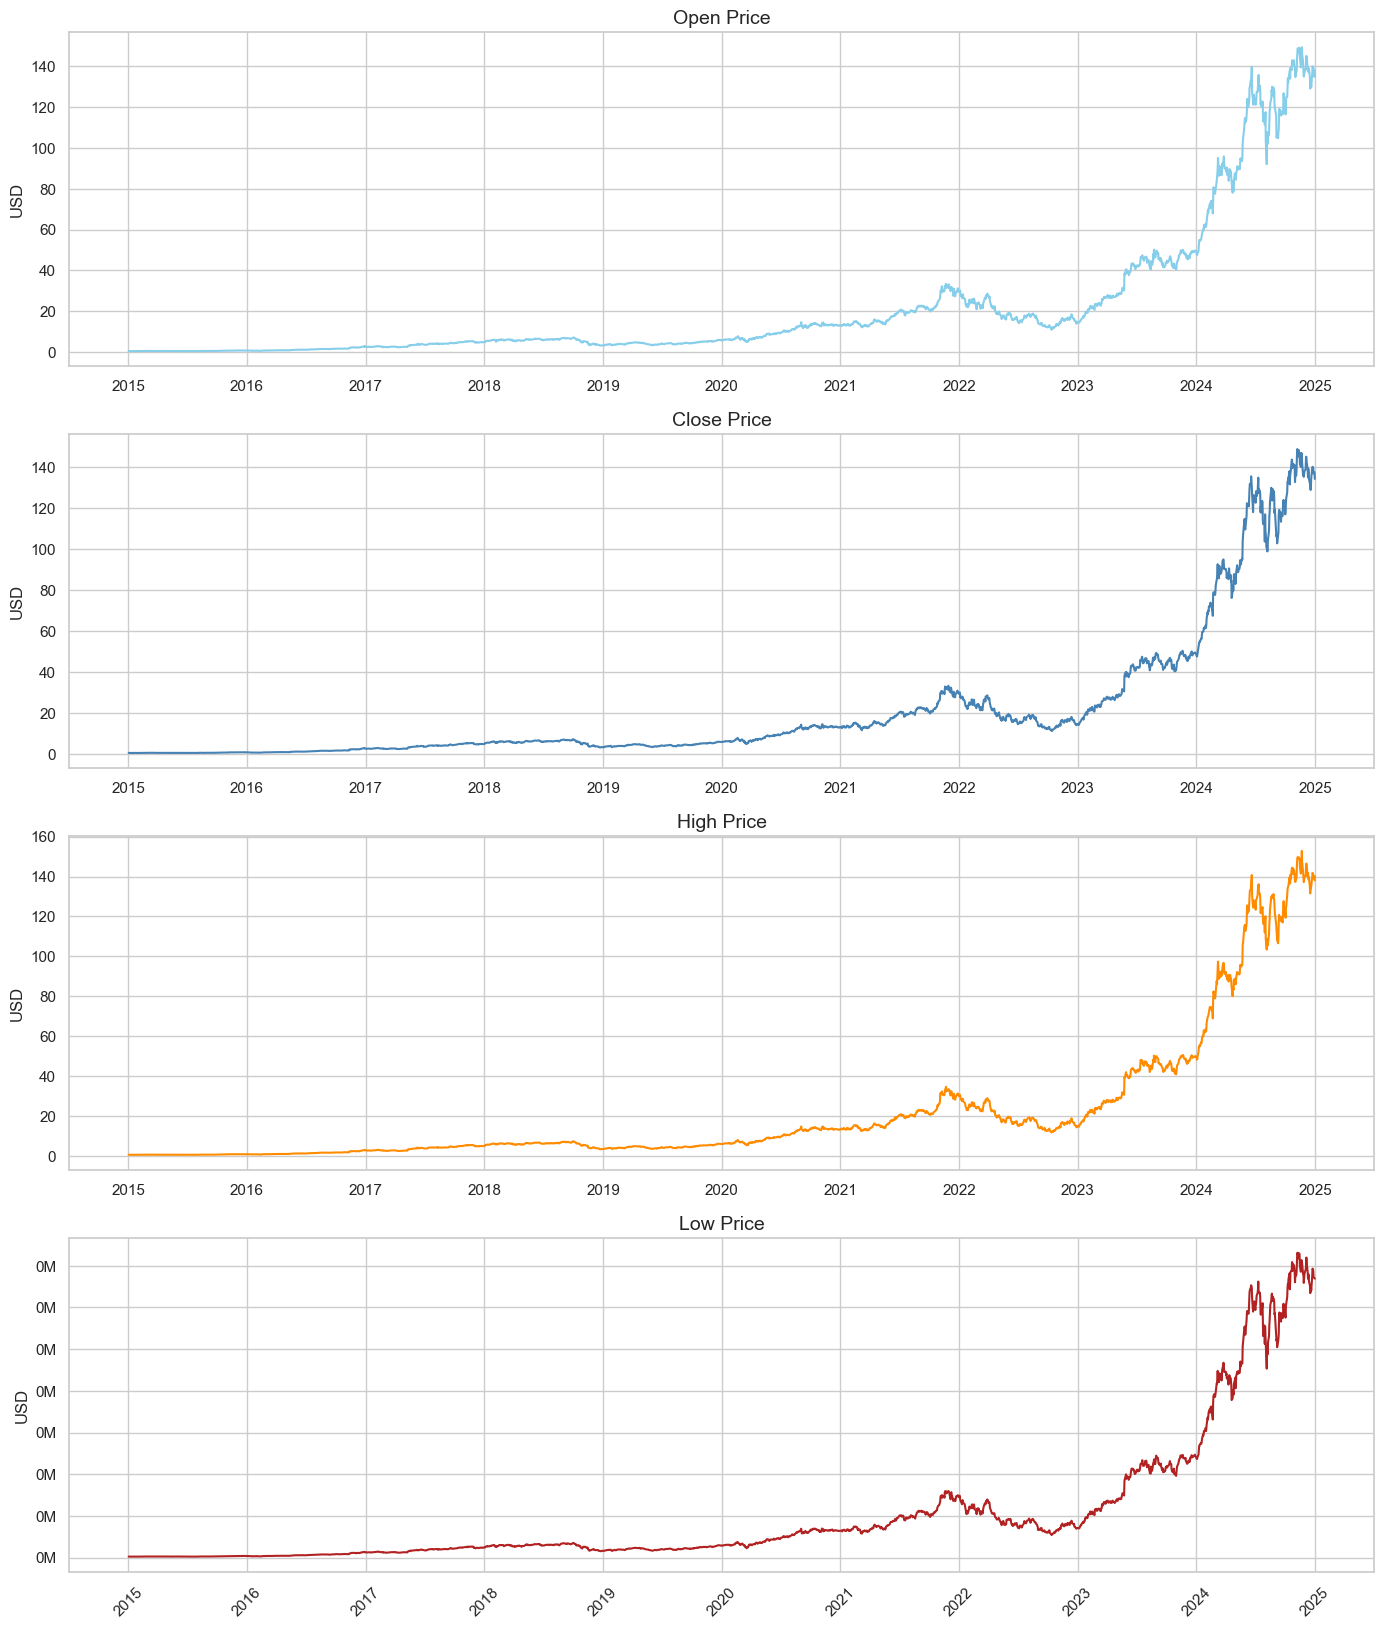

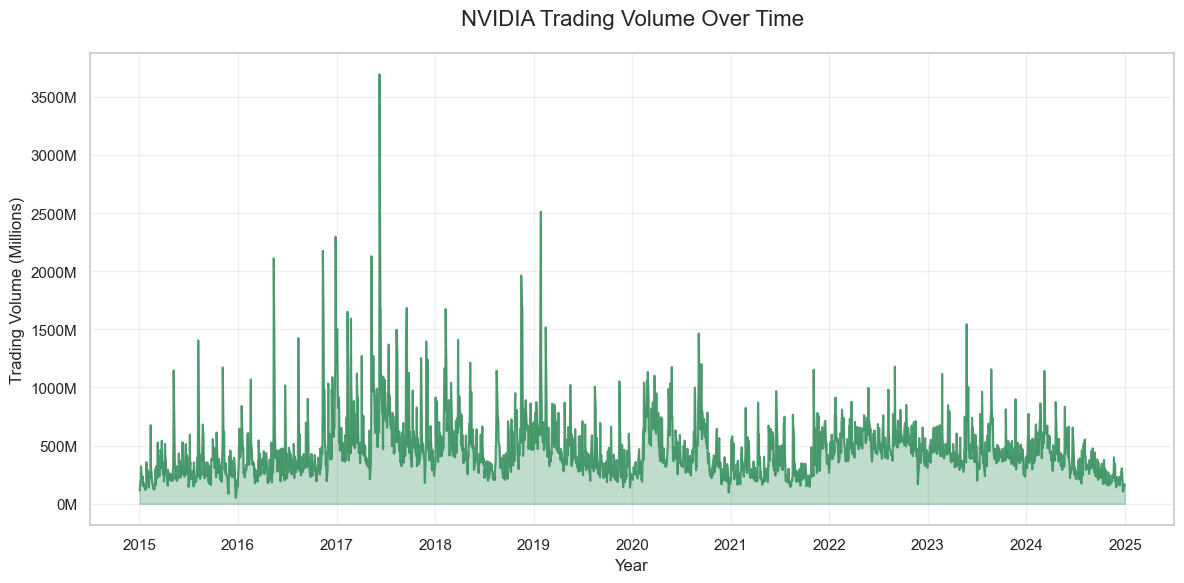

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.dates import YearLocator, DateFormatter

# โหลดข้อมูล
df = pd.read_csv("nvidia_10yr_data.csv", parse_dates=["Date"])
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.columns = df.columns.str.strip()
df.sort_values("Date", inplace=True)

# ตั้งค่า style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 20))

# Subplot 1: Open Price
plt.subplot(5, 1, 1)
sns.lineplot(data=df, x='Date', y='Open', color='skyblue')
plt.title("Open Price", fontsize=14)
plt.xlabel("")
plt.ylabel("USD")
plt.grid(True)

# Subplot 2: Close Price
plt.subplot(5, 1, 2)
sns.lineplot(data=df, x='Date', y='Close', color='steelblue')
plt.title("Close Price", fontsize=14)
plt.xlabel("")
plt.ylabel("USD")
plt.grid(True)

# Subplot 3: High Price
plt.subplot(5, 1, 3)
sns.lineplot(data=df, x='Date', y='High', color='darkorange')
plt.title("High Price", fontsize=14)
plt.xlabel("")
plt.ylabel("USD")
plt.grid(True)

# Subplot 4: Low Price
plt.subplot(5, 1, 4)
sns.lineplot(data=df, x='Date', y='Low', color='firebrick')
plt.title("Low Price", fontsize=14)
plt.xlabel("")
plt.ylabel("USD")
plt.grid(True)

# Subplot 5: Volume (ปรับปรุงใหม่)
#plt.subplot(5, 1, 5)
#plt.plot(df['Date'], df['Volume'], color='seagreen', alpha=0.7)
#plt.fill_between(df['Date'], df['Volume'], alpha=0.3, color='seagreen')
#plt.title("Trading Volume", fontsize=14)
#plt.xlabel("Date")
#plt.ylabel("Volume")

# ปรับแกน X ให้แสดงปี
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# ปรับแกน Y ให้แสดงตัวเลขที่อ่านง่าย (หน่วยล้าน)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.grid(True)

# ปรับระยะห่างและแสดงภาพ
plt.tight_layout()
plt.show()

# แสดงกราฟ Volume แยกต่างหาก (ขนาดใหญ่กว่า)
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], color='seagreen', linewidth=1.5, alpha=0.8)
plt.fill_between(df['Date'], df['Volume'], alpha=0.3, color='seagreen')
plt.title("NVIDIA Trading Volume Over Time", fontsize=16, pad=20)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Trading Volume (Millions)", fontsize=12)

# ปรับแกน
ax = plt.gca()
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show Result of Model

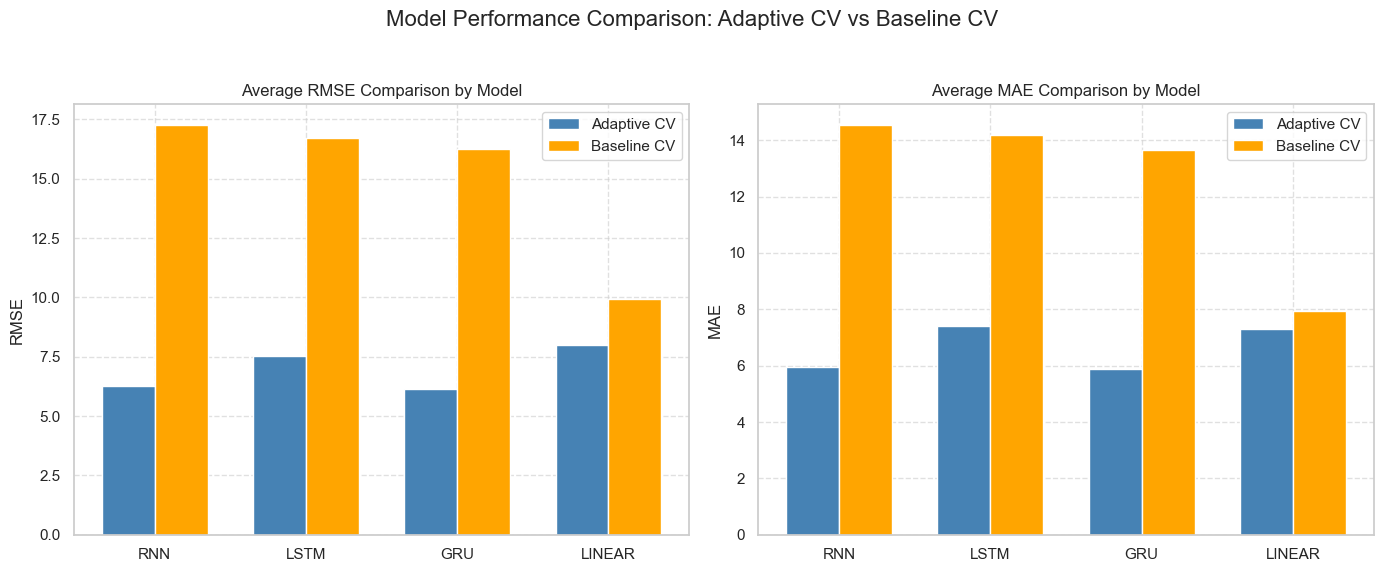

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# ข้อมูลผลลัพธ์เฉลี่ยที่ให้มา
models = ['RNN', 'LSTM', 'GRU', 'LINEAR']

# ค่าเฉลี่ย RMSE
rmse_adaptive = [6.2563, 7.5416, 6.1375, 8.0087]
rmse_baseline = [17.2639, 16.7167, 16.2603, 9.9348]

# ค่าเฉลี่ย MAE
mae_adaptive = [5.9710, 7.4106, 5.8958, 7.3146]
mae_baseline = [14.5447, 14.1777, 13.6386, 7.9484]

x = np.arange(len(models))  # ตำแหน่งของโมเดลบนแกน x
width = 0.35  # ความกว้างของบาร์กราฟ

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

# Plot RMSE
ax1.bar(x - width/2, rmse_adaptive, width, label='Adaptive CV', color='steelblue')
ax1.bar(x + width/2, rmse_baseline, width, label='Baseline CV', color='orange')
ax1.set_ylabel('RMSE')
ax1.set_title('Average RMSE Comparison by Model')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot MAE
ax2.bar(x - width/2, mae_adaptive, width, label='Adaptive CV', color='steelblue')
ax2.bar(x + width/2, mae_baseline, width, label='Baseline CV', color='orange')
ax2.set_ylabel('MAE')
ax2.set_title('Average MAE Comparison by Model')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.6)

plt.suptitle('Model Performance Comparison: Adaptive CV vs Baseline CV', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
